<a href="https://colab.research.google.com/github/victor-s-salles/AlexNet-VGG16/blob/main/CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação de Bibliotecas e Carregamento do Dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Carregar o CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalização dos dados
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Transformação dos rótulos (One-Hot Encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


170498071/170498071 [==============================] - 6s 0us/step


## 2. Visualização de Dados do CIFAR-10

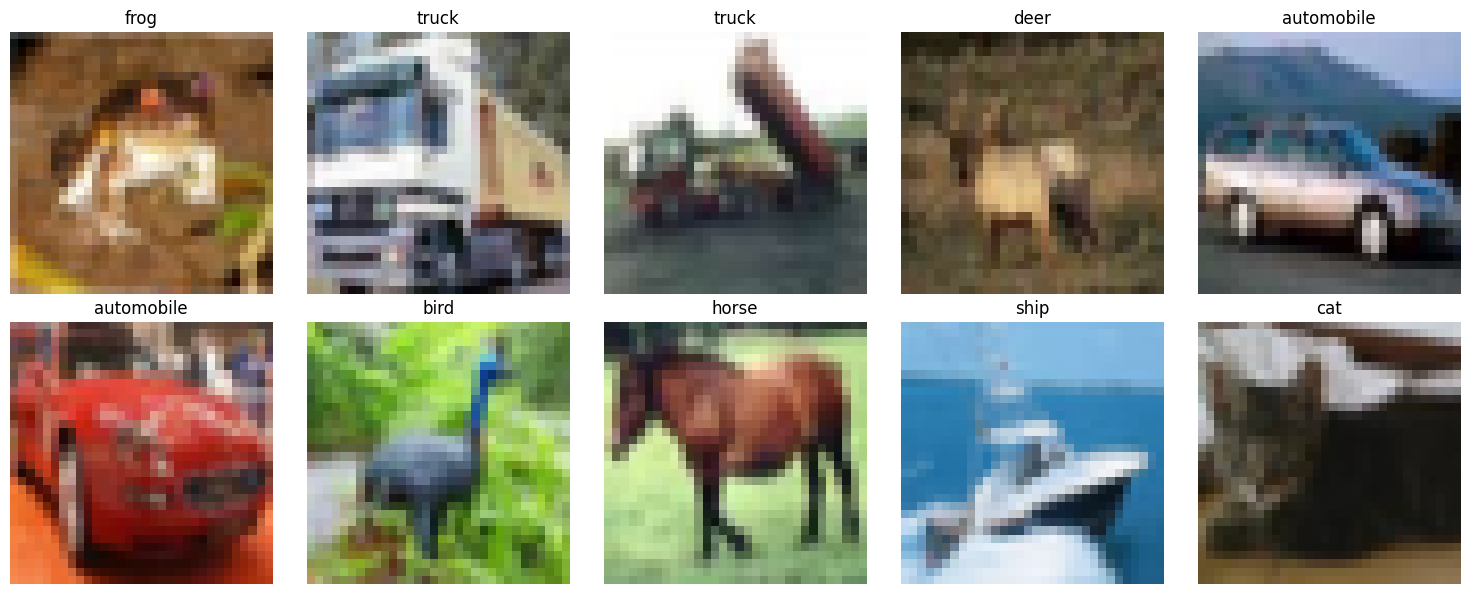

In [ ]:
import matplotlib.pyplot as plt

# Mapeamento de classes para nomes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Função para exibir imagens do CIFAR-10
def plot_cifar10_images(images, encoded_labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
    axes = axes.ravel()
    for i in range(num_rows * num_cols):
        axes[i].imshow(images[i])
        # Encontrando o índice do maior valor no one-hot encoded label
        label_index = tf.argmax(encoded_labels[i], axis=-1).numpy()
        axes[i].set_title(class_names[label_index])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Exibindo algumas imagens
plot_cifar10_images(x_train, y_train)


## 3. Definição da Arquitetura AlexNet


In [ ]:
def create_alexnet(num_classes):
    model = Sequential()
    model.add(Conv2D(48, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(192, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model


## 4. Definição da Arquitetura VGG16

In [ ]:
def create_vgg16(num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


## 5.1 Compilação e Treinamento Alexnet

In [ ]:
# Definindo hiperparâmetros
learning_rate = 0.001
batch_size = 64
epochs = 10

# Criando modelos
alexnet = create_alexnet(num_classes)


# Compilando modelos
alexnet.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Treinamento do AlexNet
history_alexnet = alexnet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)



Epoch 1/10
625/625 [==============================] - 20s 12ms/step - loss: 1.7300 - accuracy: 0.3452 - val_loss: 1.3454 - val_accuracy: 0.5049
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 1.2881 - accuracy: 0.5325 - val_loss: 1.1523 - val_accuracy: 0.5866
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 1.0920 - accuracy: 0.6129 - val_loss: 0.9837 - val_accuracy: 0.6543
Epoch 4/10
625/625 [==============================] - 7s 10ms/step - loss: 0.9554 - accuracy: 0.6612 - val_loss: 0.9869 - val_accuracy: 0.6529
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.8556 - accuracy: 0.6988 - val_loss: 0.8378 - val_accuracy: 0.7064
Epoch 6/10
625/625 [==============================] - 7s 10ms/step - loss: 0.7620 - accuracy: 0.7345 - val_loss: 0.8190 - val_accuracy: 0.7185
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6903 - accuracy: 0.7597 - val_loss: 0.7887 - val_accuracy: 0.724

## 5.2 Compilação e Treinamento VGG16

In [ ]:
# Definindo hiperparâmetros
learning_rate = 0.0001 # 0.001 estava causando uma accuracy de no maximo 0.10
batch_size = 64
epochs = 10

# Criando modelos
vgg16 = create_vgg16(num_classes)

# Compilando modelos
vgg16.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do VGG16
history_vgg16 = vgg16.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 35s 47ms/step - loss: 1.9671 - accuracy: 0.2011 - val_loss: 1.8011 - val_accuracy: 0.2904
Epoch 2/10
625/625 [==============================] - 29s 46ms/step - loss: 1.5710 - accuracy: 0.3865 - val_loss: 1.3783 - val_accuracy: 0.4773
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 1.2717 - accuracy: 0.5256 - val_loss: 1.1814 - val_accuracy: 0.5636
Epoch 4/10
625/625 [==============================] - 29s 46ms/step - loss: 1.0484 - accuracy: 0.6222 - val_loss: 1.0238 - val_accuracy: 0.6400
Epoch 5/10
625/625 [==============================] - 29s 46ms/step - loss: 0.8820 - accuracy: 0.6865 - val_loss: 0.9194 - val_accuracy: 0.6796
Epoch 6/10
625/625 [==============================] - 29s 46ms/step - loss: 0.7419 - accuracy: 0.7394 - val_loss: 0.8739 - val_accuracy: 0.7020
Epoch 7/10
625/625 [==============================] - 28s 44ms/step - loss: 0.6193 - accuracy: 0.7832 - val_loss: 0.8377 - val_accuracy:

## 6.1 Definição para visualização de Resultados de Treinamento AlexNet

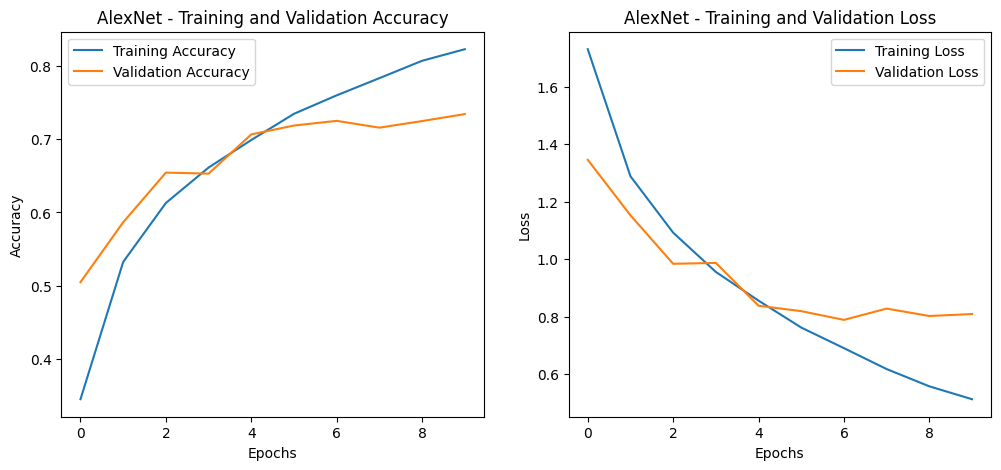

313/313 [==============================] - 1s 2ms/step


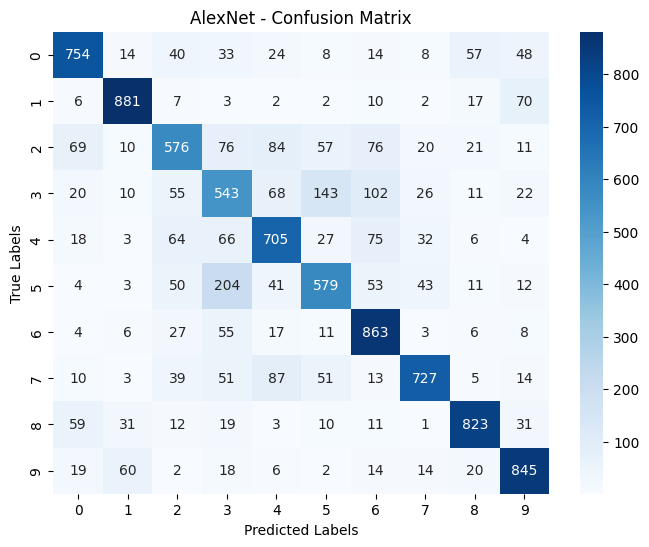

313/313 [==============================] - 1s 2ms/step
AlexNet Classification Report:
               precision    recall  f1-score   support

    airplane       0.78      0.75      0.77      1000
  automobile       0.86      0.88      0.87      1000
        bird       0.66      0.58      0.62      1000
         cat       0.51      0.54      0.53      1000
        deer       0.68      0.70      0.69      1000
         dog       0.65      0.58      0.61      1000
        frog       0.70      0.86      0.77      1000
       horse       0.83      0.73      0.78      1000
        ship       0.84      0.82      0.83      1000
       truck       0.79      0.84      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [ ]:
# Importações necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.metrics import classification_report


# Função para plotar acurácia e perda
def plot_history(history, title=''):
    plt.figure(figsize=(12, 5))

    # Plotar Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotar Perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# Função para plotar a matriz de confusão
def plot_confusion_matrix(model, x_test, y_test, title=''):
    predictions = model.predict(x_test)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



# Avaliação AlexNet

plot_history(history_alexnet, 'AlexNet')
plot_confusion_matrix(alexnet, x_test, y_test, 'AlexNet')


alexnet_predictions = alexnet.predict(x_test)
y_pred_alexnet = np.argmax(alexnet_predictions, axis=1)
report_alexnet = classification_report(np.argmax(y_test, axis=1), y_pred_alexnet, target_names=class_names)
print("AlexNet Classification Report:\n", report_alexnet)


## 6.2 Visualização de Resultados de Treinamento AlexNet

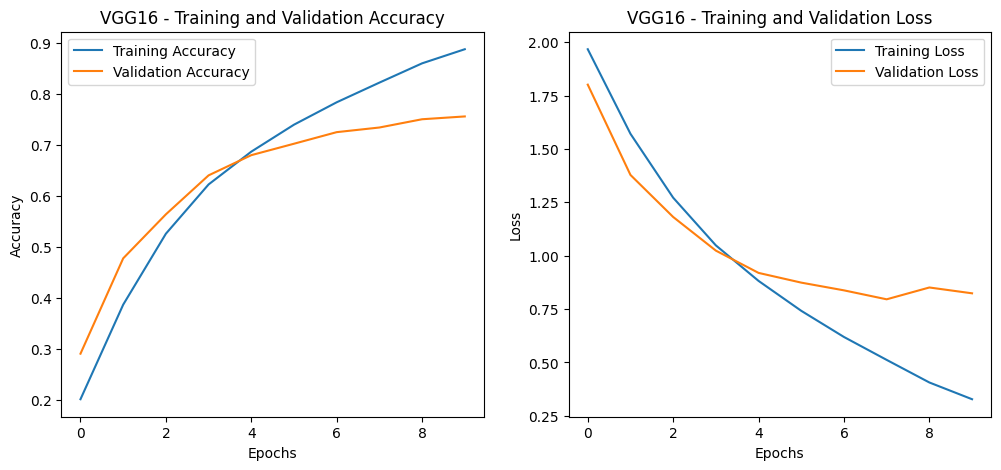

313/313 [==============================] - 3s 7ms/step


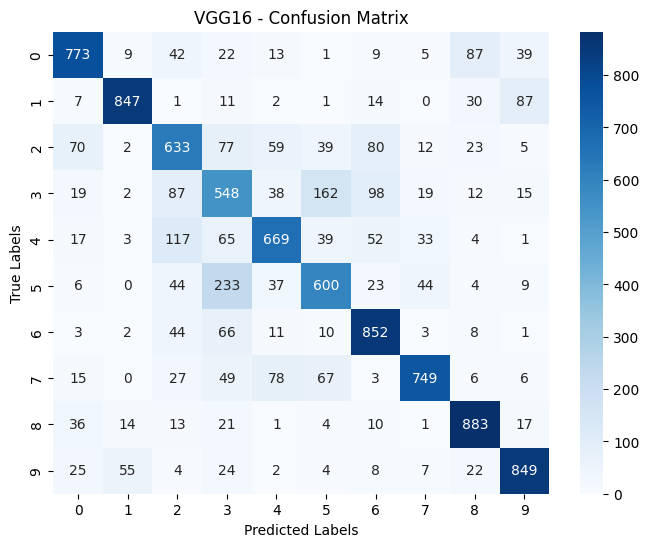

313/313 [==============================] - 2s 7ms/step
VGG16 Classification Report:
               precision    recall  f1-score   support

    airplane       0.80      0.77      0.78      1000
  automobile       0.91      0.85      0.88      1000
        bird       0.63      0.63      0.63      1000
         cat       0.49      0.55      0.52      1000
        deer       0.74      0.67      0.70      1000
         dog       0.65      0.60      0.62      1000
        frog       0.74      0.85      0.79      1000
       horse       0.86      0.75      0.80      1000
        ship       0.82      0.88      0.85      1000
       truck       0.83      0.85      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [ ]:
# Avaliação VGG16
plot_history(history_vgg16, 'VGG16')
plot_confusion_matrix(vgg16, x_test, y_test, 'VGG16')

vgg16_predictions = vgg16.predict(x_test)
y_pred_vgg16 = np.argmax(vgg16_predictions, axis=1)
report_vgg16 = classification_report(np.argmax(y_test, axis=1), y_pred_vgg16, target_names=class_names)
print("VGG16 Classification Report:\n", report_vgg16)